# Problem Statement :
- Porter is India's Largest Marketplace for Intra-City Logistics. 
- Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. 
- Currently, the company has serviced 5+ million customers.


- Porter works with a wide range of restaurants for delivering their items directly to the people.

- Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.
- This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Dictionary

- Each row in this file corresponds to one unique delivery. 
- Each column corresponds to a feature as explained below.


        1. market_id : integer id for the market where the restaurant lies
        2. created_at : the timestamp at which the order was placed
        3. actual_delivery_time : the timestamp when the order was delivered
        3. store_id 
        4. store_primary_category : category for the restaurant
        5. order_protocol : integer code value for order protocol
          (how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
        6. total_items 
        6. subtotal : final price of the order
        7. num_distinct_items : the number of distinct items in the order
        8. min_item_price : price of the cheapest item in the order
        9. max_item_price : price of the costliest item in order
        10. total_onshift_partners : number of delivery partners on duty at the time order was placed
        11. total_busy_partners : number of delivery partners attending to other tasks
        12. total_outstanding_orders : total number of orders to be fulfilled at the moment

In [ ]:
file_path = '/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Logistincs_NN/dataset.csv'
df = pd.read_csv(file_path)
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
date_format = "%Y-%m-%d %H:%M:%S"

In [ ]:
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
df["created_at"] = pd.to_datetime(df["created_at"], format= "%Y-%m-%d %H:%M:%S")


In [ ]:
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"], format= "%Y-%m-%d %H:%M:%S")



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [ ]:
df.describe() 

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
df.dtypes


market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                            object
store_primary_category              object
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
dtype: object

In [ ]:
df.sample()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
97981,2.0,2015-01-29 03:42:00,2015-01-29 04:44:02,a6ade5aa93b826f8de63c663e1159bf7,pizza,3.0,4,2546,4,499,729,50.0,41.0,56.0


In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders'], dtype='object')

In [ ]:
df.nunique()

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

In [ ]:
categorical_features = ["market_id","store_id","store_primary_category","order_protocol","total_items","num_distinct_items"]
numerical_features = ['subtotal','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']
date_time_features = ['created_at','actual_delivery_time']

In [ ]:
len(categorical_features), len(numerical_features),len(date_time_features)

(6, 6, 2)

In [ ]:
df.describe().loc[["mean","50%"]].T.loc[numerical_features]

,mean,50%
subtotal,2682.331402,2200.0
min_item_price,686.218470,595.0
max_item_price,1159.588630,1095.0
total_onshift_partners,44.808093,37.0
total_busy_partners,41.739747,34.0
total_outstanding_orders,58.050065,41.0


In [ ]:
missing_values = df.isna().sum().reset_index()
missing_values.columns = ["Feature", "Missing_values"]
missing_values["Missing_values_percentage"] = missing_values["Missing_values"]/len(df) * 100
missing_values


,Feature,Missing_values,Missing_values_percentage
0,market_id,987,0.499929
1,created_at,0,0.000000
2,actual_delivery_time,7,0.003546
3,store_id,0,0.000000
4,store_primary_category,4760,2.411006
5,order_protocol,995,0.503981
6,total_items,0,0.000000
7,subtotal,0,0.000000
8,num_distinct_items,0,0.000000
9,min_item_price,0,0.000000


## Distribution of final price of the orders.

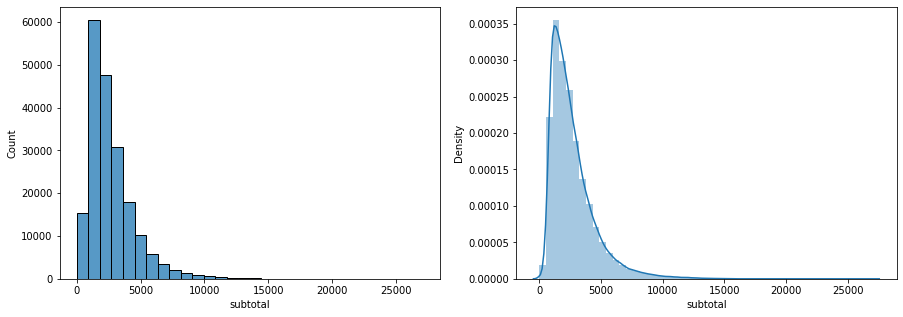

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df["subtotal"],bins=30)
plt.subplot(1,2,2)
sns.distplot(df["subtotal"])


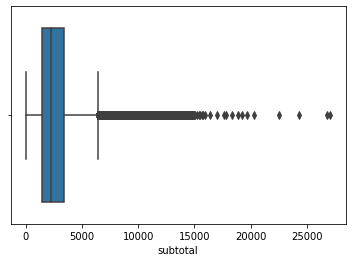

In [ ]:
sns.boxplot(df["subtotal"])

# Creating the target column:
###  time taken in each delivery from order timestamp (created_at) and delivery timestamp (actual_delivery_time)

      delivery_time = actual_delivery_time - created_at
      in minutes 

In [ ]:
 df["delivery_time"] = (df["actual_delivery_time"]-df["created_at"])/ pd.Timedelta(minutes=1)

In [ ]:
df["delivery_time"].describe().reset_index()

,index,delivery_time
0,count,197421.000000
1,mean,48.470956
2,std,320.493482
3,min,1.683333
4,25%,35.066667
5,50%,44.333333
6,75%,56.350000
7,max,141947.650000


In [ ]:
df["delivery_time"].quantile([0.01,0.10,0.25,0.50,0.75,0.90,0.99,0.995,0.999,0.9995])

0.0100     19.200000
0.1000     28.316667
0.2500     35.066667
0.5000     44.333333
0.7500     56.350000
0.9000     70.583333
0.9900    107.913333
0.9950    122.215000
0.9990    165.581000
0.9995    201.086167
Name: delivery_time, dtype: float64

In [ ]:
# considering delivery time > 165 minutes as a complete outlier. hence removing those values from the data. 
df = df.loc[~(df["delivery_time"]>df["delivery_time"].quantile(0.999))]

# further outlier treatment to be done later.


### Missing value treatment for "order_protocol":

In [ ]:
# order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
df["order_protocol"].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [ ]:
df["order_protocol"] = df["order_protocol"].astype('object')

In [ ]:

# filling NaN category store primary category with Other. 
df.order_protocol = df.order_protocol.fillna("Other")


In [ ]:
df["order_protocol"].unique()

array([1.0, 2.0, 3.0, 4.0, 'Other', 5.0, 6.0, 7.0], dtype=object)

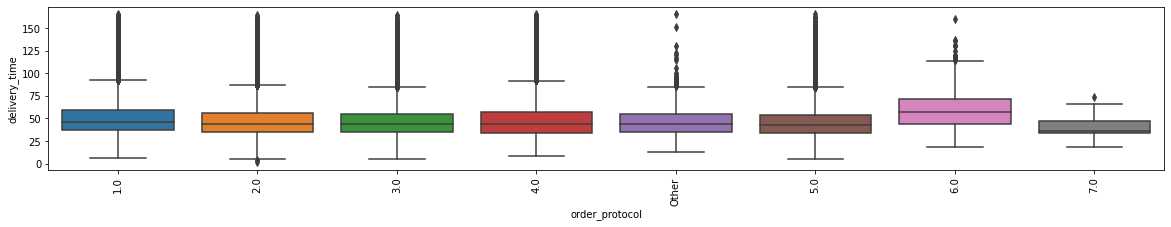

In [ ]:

sns.boxplot(x = df["order_protocol"],
            y = df["delivery_time"])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.groupby(["order_protocol"]).describe()["delivery_time"]

,count,mean,std,min,25%,50%,75%,max
order_protocol,,,,,,,,
1.0,54671.0,49.748925,18.452947,6.433333,36.766667,46.483333,59.166667,164.900000
2.0,24018.0,47.106471,17.560518,1.683333,35.016667,44.100000,55.716667,164.200000
3.0,53154.0,46.690563,16.844630,5.416667,34.983333,43.750000,55.033333,164.650000
4.0,19325.0,48.144899,20.203254,8.600000,34.100000,44.250000,57.250000,165.233333
5.0,44252.0,45.409249,17.123764,4.950000,33.550000,42.416667,53.900000,164.966667
6.0,790.0,59.679388,21.491241,18.316667,43.800000,56.616667,71.887500,160.016667
7.0,19.0,41.370175,13.797148,18.050000,33.433333,36.166667,47.166667,74.083333
Other,994.0,46.712056,17.647980,12.916667,34.650000,43.500000,54.966667,165.416667


In [ ]:
df = df[~df["actual_delivery_time"].isna()]

In [ ]:
missing_values = df.isna().sum().reset_index()
missing_values.columns = ["Feature", "Missing_values"]
missing_values["Missing_values_percentage"] = missing_values["Missing_values"]/len(df) * 100
missing_values


,Feature,Missing_values,Missing_values_percentage
0,market_id,986,0.499942
1,created_at,0,0.000000
2,actual_delivery_time,0,0.000000
3,store_id,0,0.000000
4,store_primary_category,4756,2.411483
5,order_protocol,994,0.503998
6,total_items,0,0.000000
7,subtotal,0,0.000000
8,num_distinct_items,0,0.000000
9,min_item_price,0,0.000000


In [ ]:
# observing time series of Delivery_time : for seasonality and patern

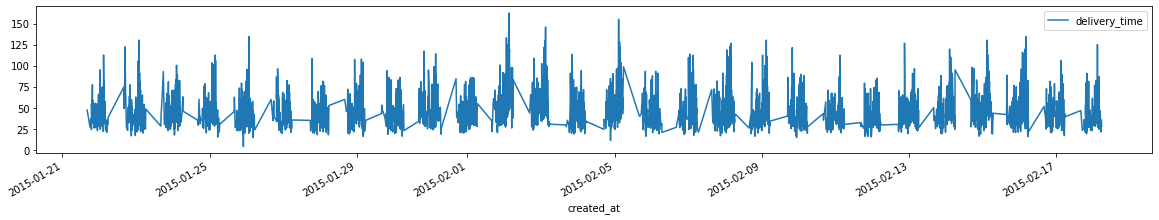

In [ ]:
plt.rcParams['figure.figsize'] = (20, 3)

df[["created_at","delivery_time"]].set_index("created_at").head(5000).plot()

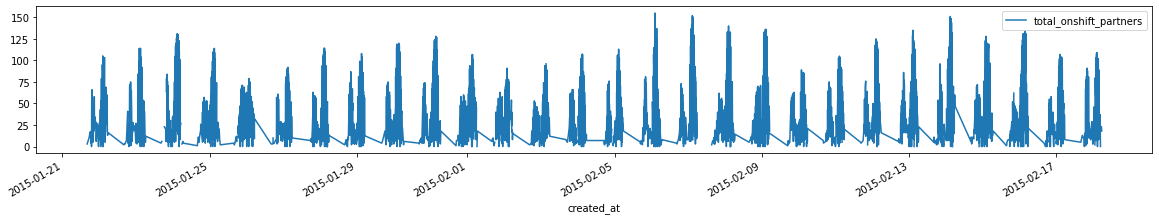

In [ ]:
df[["created_at","total_onshift_partners"]].set_index("created_at").head(5000).plot()

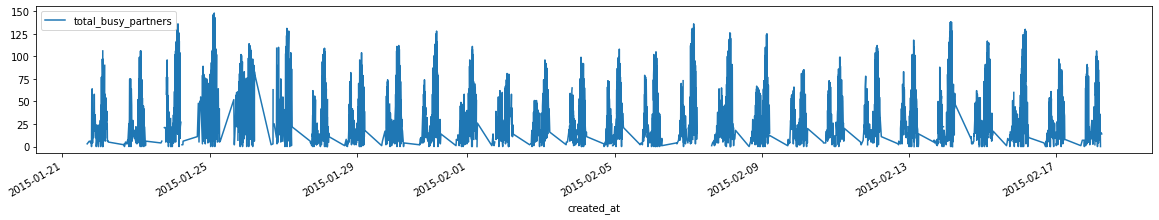

In [ ]:
df[["created_at","total_busy_partners"]].set_index("created_at").head(5000).plot()

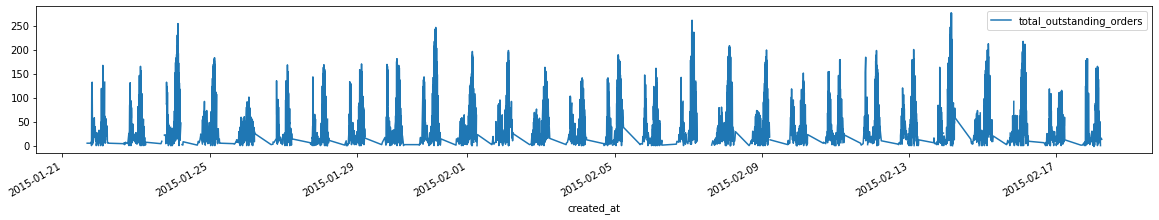

In [ ]:
df[["created_at","total_outstanding_orders"]].set_index("created_at").head(5000).plot()

## store_primary_category

In [ ]:
df["store_primary_category"].nunique()

74

In [ ]:
df["store_primary_category"].value_counts(dropna=False)

american             19378
pizza                17306
mexican              17087
burger               10948
sandwich             10051
chinese               9415
japanese              9178
dessert               8759
fast                  7364
indian                7307
thai                  7216
italian               7168
vietnamese            6088
mediterranean         5502
breakfast             5418
NaN                   4756
other                 3986
salad                 3743
greek                 3323
seafood               2730
barbecue              2722
asian                 2445
cafe                  2225
sushi                 2182
alcohol               1848
korean                1813
smoothie              1657
catering              1629
middle-eastern        1498
hawaiian              1498
dim-sum               1112
steak                 1092
vegetarian             844
burmese                821
pasta                  632
persian                607
french                 575
l

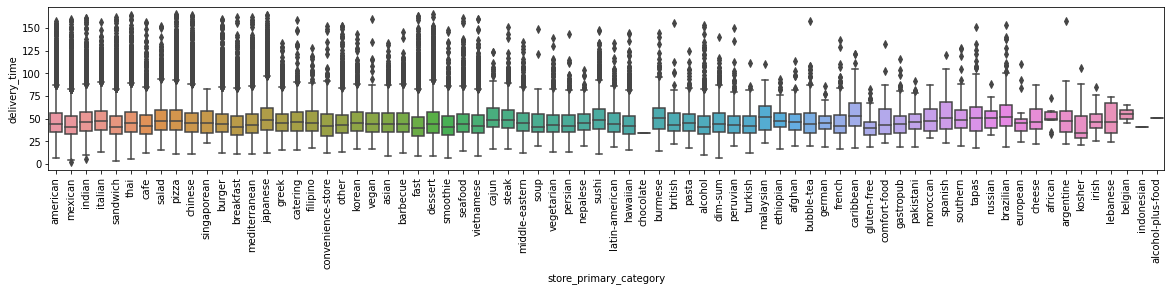

In [ ]:

sns.boxplot(x = df["store_primary_category"],
            y = df["delivery_time"])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# filling NaN category store primary category with Other. 
df.store_primary_category = df.store_primary_category.fillna("Other")


In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)


## Engineering Feature called Ordered_at_hour : at what hour the order was creatd

In [ ]:
df["order_at_hour"] = df["created_at"].dt.hour


In [ ]:
df["created_at"].dt.month_name().value_counts()

February    128796
January      68427
Name: created_at, dtype: int64

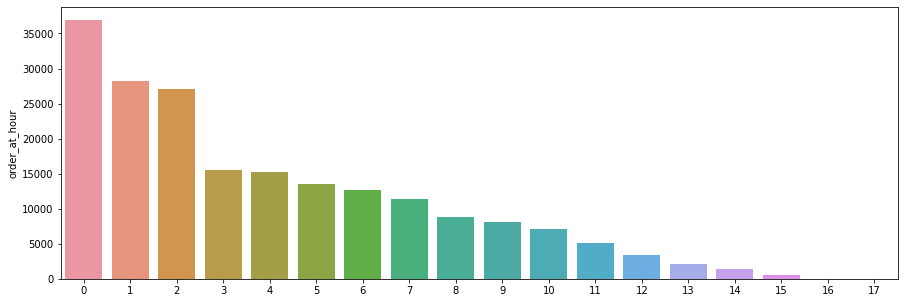

In [ ]:
order_time = df["order_at_hour"].value_counts().reset_index().sort_values(by="index")
sns.barplot(x =order_time.index,
            y = order_time.order_at_hour)

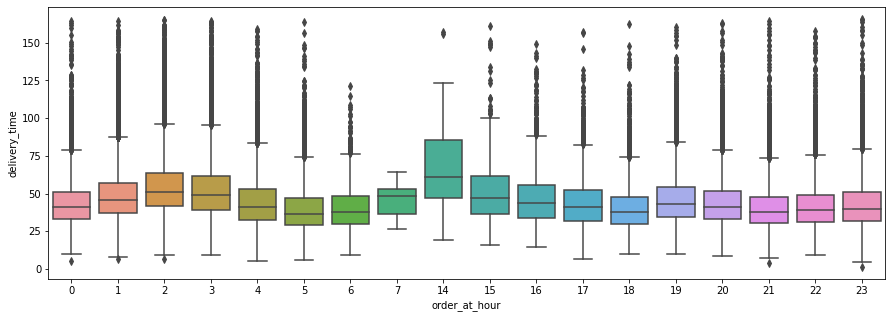

In [ ]:
sns.boxplot(x = df["order_at_hour"],
            y = df["delivery_time"])

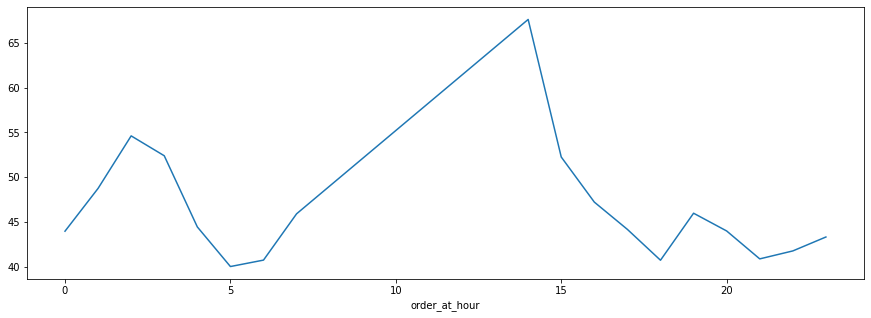

In [ ]:
df.groupby("order_at_hour")["delivery_time"].mean().plot()

In [ ]:
df["market_id"].nunique(dropna=False)

7

2.0    27.895834
4.0    24.112806
1.0    19.251811
3.0    11.801869
5.0     9.119119
6.0     7.318619
0.0     0.499942
Name: market_id, dtype: float64

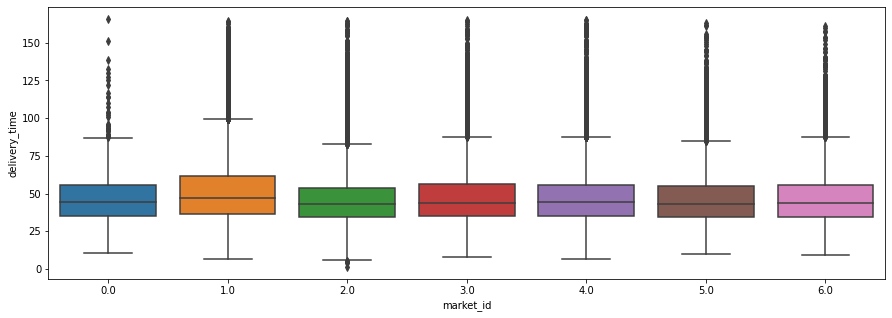

In [ ]:
from locale import normalize
display(df["market_id"].value_counts(normalize=True)*100)
df["market_id"] = df["market_id"].fillna(0)
df["market_id"] = df["market_id"].astype("object")
sns.boxplot(x = df["market_id"],
            y = df["delivery_time"])
plt.show()

In [ ]:
# filling null values of Total_onshift_partners , busy partners and outstanding orders as per mean of the relevant hour from the data.

In [ ]:
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df.groupby('order_at_hour')['total_onshift_partners'].transform('mean'))
df['total_busy_partners'] = df['total_busy_partners'].fillna(df.groupby('order_at_hour')['total_busy_partners'].transform('mean'))
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df.groupby('order_at_hour')['total_outstanding_orders'].transform('mean'))

In [ ]:
# remaining null values check : 

In [ ]:
missing_values = df.isna().sum().reset_index()
missing_values.columns = ["Feature", "Missing_values"]
missing_values["Missing_values_percentage"] = missing_values["Missing_values"]/len(df) * 100
missing_values


,Feature,Missing_values,Missing_values_percentage
0,market_id,0,0.0
1,created_at,0,0.0
2,actual_delivery_time,0,0.0
3,store_id,0,0.0
4,store_primary_category,0,0.0
5,order_protocol,0,0.0
6,total_items,0,0.0
7,subtotal,0,0.0
8,num_distinct_items,0,0.0
9,min_item_price,0,0.0


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.sample()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
160373,1.0,2015-02-09 03:07:55,2015-02-09 04:51:38,44885837c518b06e3f98b41ab8cedc0f,dessert,4.0,2,1250,2,500,500,10.0,10.0,17.0,103.716667,3


In [ ]:
df.nunique().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
index,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
0,7,180820,177930,6742,75,8,57,8366,20,2312,2651,189,176,298,6940,18


In [ ]:
df.order_at_hour = df.order_at_hour.astype("object")

In [ ]:
df.describe(include="object")

,market_id,store_id,store_primary_category,order_protocol,order_at_hour
count,197223.0,197223,197223,197223.0,197223
unique,7.0,6742,75,8.0,18
top,2.0,d43ab110ab2489d6b9b2caa394bf920f,american,1.0,2
freq,55017.0,936,19378,54671.0,36932


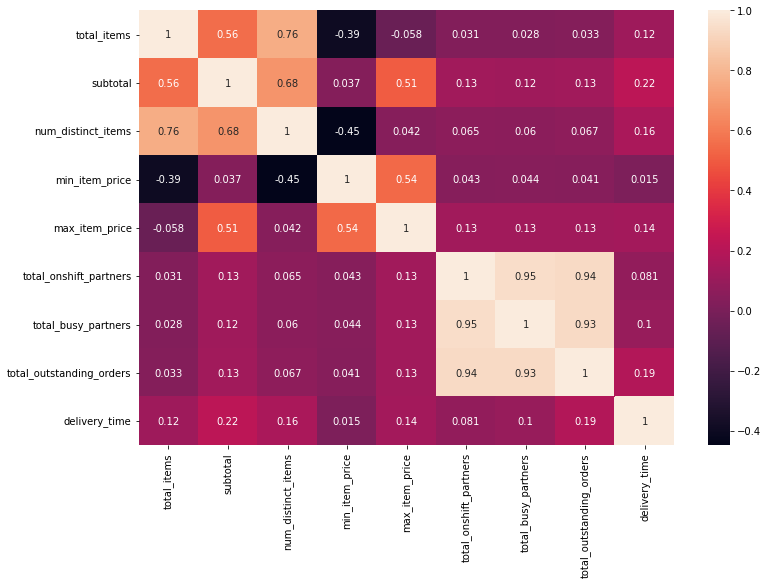

In [ ]:
 plt.rcParams['figure.figsize'] = (12, 8)

 sns.heatmap(df.corr(),annot=True)


# Encoding : 

In [ ]:
data = df.copy(deep = True)

In [ ]:
data.drop(["created_at","actual_delivery_time"],axis = 1, inplace = True)

In [ ]:
data.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21
2,3.0,f0ade77b43923b38237db569b016ba25,Other,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20
3,3.0,f0ade77b43923b38237db569b016ba25,Other,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21
4,3.0,f0ade77b43923b38237db569b016ba25,Other,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2


In [ ]:
data['store_id'] = data.groupby('store_id')['delivery_time'].transform('median')
data['store_primary_category'] = data.groupby('store_primary_category')['delivery_time'].transform('median')

data['order_at_hour'] = data.groupby('order_at_hour')['delivery_time'].transform('median')


In [ ]:
data.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
0,1.0,62.983333,44.350000,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,38.916667
1,2.0,39.833333,41.333333,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,38.133333
2,3.0,39.833333,44.816667,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,41.266667
3,3.0,39.833333,44.816667,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,38.133333
4,3.0,39.833333,44.816667,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,51.200000


In [ ]:
encoded_data = pd.get_dummies(data,columns=["market_id","order_protocol"])

In [ ]:
encoded_data.head()

,store_id,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour,market_id_0.0,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,order_protocol_Other
0,62.983333,44.350000,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,38.916667,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,39.833333,41.333333,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,38.133333,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,39.833333,44.816667,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,41.266667,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,39.833333,44.816667,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,38.133333,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,39.833333,44.816667,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,51.200000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


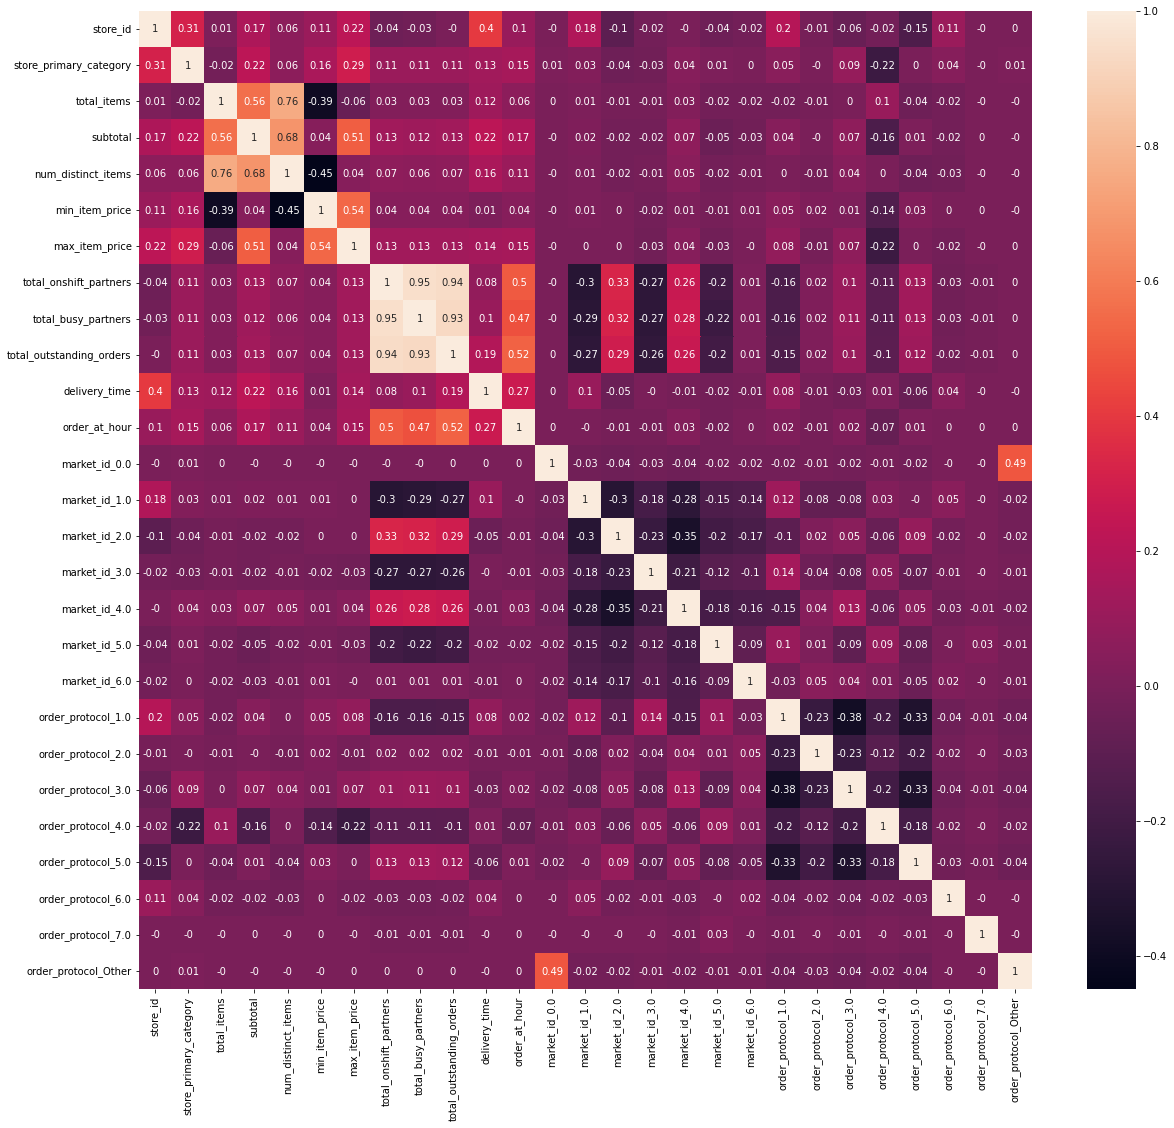

In [ ]:
 plt.rcParams['figure.figsize'] = (20, 18)

sns.heatmap(encoded_data.corr().round(2),annot=True)


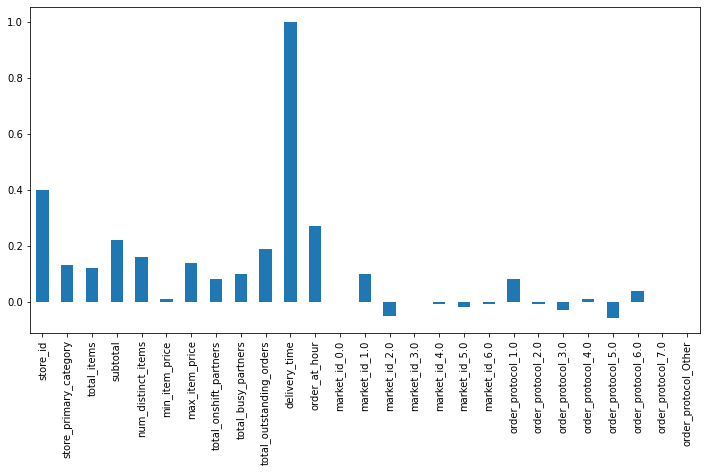

In [ ]:
 plt.rcParams['figure.figsize'] = (12, 6)

encoded_data.corr().round(2)["delivery_time"].plot(kind="bar")


In [ ]:
X = encoded_data.drop(['delivery_time'],axis = 1)
y = encoded_data["delivery_time"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,
                                                      y,
                                                      test_size = 0.25,
                                                      random_state=52)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, median_absolute_error, r2_score, adjusted_mutual_info_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor(n_estimators = 100)

In [ ]:

from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(RFR, 
                        X_train,
                        y_train,
                        scoring="r2",
                     cv=5, return_train_score=True)


In [ ]:
>>> sorted(scores.keys())
['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro',
 'train_prec_macro', 'train_rec_macro']
>>> scores['train_rec_macro']
array([0.97..., 0.97..., 0.99..., 0.98..., 0.98...])